In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA


In [2]:
df = pd.read_csv('Floor2.csv', index_col='Date', parse_dates=True)


In [3]:
final_df=pd.DataFrame(columns=['lights','acs','plug'])
final_df

,lights,acs,plug


In [4]:
final_df['lights']=df['z1_Light(kW)']+df['z2_Light(kW)']+df['z3_Light(kW)']+df['z4_Light(kW)']
final_df['acs']=df['z2_AC1(kW)']+df['z2_AC2(kW)']+df['z2_AC3(kW)']+df['z2_AC4(kW)']
final_df['plug']=df['z1_Plug(kW)']+df['z2_Plug(kW)']+df['z3_Plug(kW)']

In [5]:
final_df['Power_consumption']=final_df['lights']+final_df['acs']+final_df['plug']


In [6]:
final_df=final_df.fillna(final_df.mean())

In [31]:
df1=final_df.resample('h').mean()
df1

,lights,acs,plug,Power_consumption
Date,,,,
2018-07-01 00:00:00,73.675167,45.472833,36.477000,155.625000
2018-07-01 01:00:00,73.970167,45.849500,36.867333,156.687000
2018-07-01 02:00:00,73.782667,45.831833,36.668000,156.282500
2018-07-01 03:00:00,73.122167,45.616667,35.607667,154.346500
2018-07-01 04:00:00,83.146000,45.502833,33.766000,162.414833
...,...,...,...,...
2019-12-31 19:00:00,68.292167,23.921333,19.171833,111.385333
2019-12-31 20:00:00,68.485333,28.528000,19.147667,116.161000
2019-12-31 21:00:00,53.983000,22.726333,19.749833,96.459167


In [32]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Power_consumption'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -11.689235496431126
p-value: 1.6681664875543365e-21
Critical Values: {'1%': -3.4308479883141025, '5%': -2.861760086995701, '10%': -2.5668871473939694}


In [33]:
df2 = df1.diff().dropna()


In [34]:
import statsmodels.api as sm

In [35]:
model = sm.tsa.arima.ARIMA(df1.Power_consumption, order=(1,1,1))
result = model.fit()

In [36]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:      Power_consumption   No. Observations:                13176
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -58531.044
Date:                Thu, 27 Apr 2023   AIC                         117068.087
Time:                        12:48:18   BIC                         117090.546
Sample:                    07-01-2018   HQIC                        117075.586
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1415      0.029      4.816      0.000       0.084       0.199
ma.L1          0.1621      0.030      5.481      0.000       0.104       0.220
sigma2       422.9579      2.639    160.298      0.0

<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

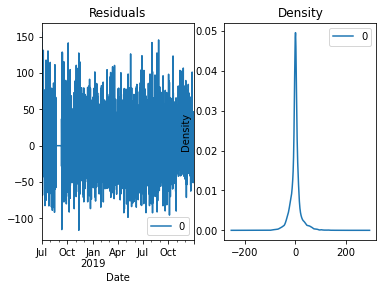

In [37]:
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

In [41]:
forecast = result.forecast(steps=13176)

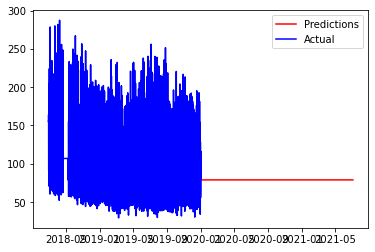

In [42]:
plt.plot(forecast.index, forecast.values, color='red', label='Predictions')
plt.plot(df1.index, df1.Power_consumption, color='blue', label='Actual')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#test['z2_AC1(kW)'].mean()
rmse=sqrt(mean_squared_error(forecast,df1['Power_consumption']))
print(rmse)

51.90743788867223


In [44]:
df1['year'] = df1.index.year
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['hour']=df1.index.hour

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
df1

,lights,acs,plug,Power_consumption,year,month,day,hour
Date,,,,,,,,
2018-07-01 00:00:00,73.675167,45.472833,36.477000,155.625000,2018,7,1,0
2018-07-01 01:00:00,73.970167,45.849500,36.867333,156.687000,2018,7,1,1
2018-07-01 02:00:00,73.782667,45.831833,36.668000,156.282500,2018,7,1,2
2018-07-01 03:00:00,73.122167,45.616667,35.607667,154.346500,2018,7,1,3
2018-07-01 04:00:00,83.146000,45.502833,33.766000,162.414833,2018,7,1,4
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,68.292167,23.921333,19.171833,111.385333,2019,12,31,19
2019-12-31 20:00:00,68.485333,28.528000,19.147667,116.161000,2019,12,31,20
2019-12-31 21:00:00,53.983000,22.726333,19.749833,96.459167,2019,12,31,21


In [47]:
train_size = int(len(df1) * 0.8)
train_data, test_data = df1[:train_size], df1[train_size:]


In [48]:
X_train = train_data[['year', 'month', 'day','hour']]
y_train = train_data['Power_consumption']
X_test = test_data[['year', 'month', 'day','hour']]
y_test = test_data['Power_consumption']

In [49]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: {:.2f}'.format(mse))


Mean squared error: 1417.70


In [51]:
new_data = pd.DataFrame({'year': [2020], 'month': [1], 'day': [1],'hour':[23]})
y_pred = model1.predict(new_data)
print('Predicted value for new data: {:.2f}'.format(y_pred[0]))

Predicted value for new data: 116.82


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import time

import datetime as datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Floor2.csv')#,parse_dates=['Date'],index_col=0)
df

,Date,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
0,2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,35.76
1,2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,35.81
2,2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,35.78
3,2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,35.83
4,2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,35.86
...,...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,0.02,0.01,2.22,0.03,0.00,0.01,8.85,27.00,10.98,1.25,18.28
790556,2019-12-31 23:56:00,0.02,0.02,13.14,0.02,0.01,0.00,8.86,27.15,10.98,1.25,18.27
790557,2019-12-31 23:57:00,0.01,0.01,51.20,0.03,0.01,0.01,8.90,20.62,11.03,1.24,18.30
790558,2019-12-31 23:58:00,0.01,0.01,40.38,0.03,0.00,0.00,8.87,17.81,11.03,1.25,18.28


In [3]:
x=df[['Date','z2_AC1(kW)']]
x

,Date,z2_AC1(kW)
0,2018-07-01 00:00:00,45.24
1,2018-07-01 00:01:00,45.28
2,2018-07-01 00:02:00,45.24
3,2018-07-01 00:03:00,45.26
4,2018-07-01 00:04:00,45.22
...,...,...
790555,2019-12-31 23:55:00,2.22
790556,2019-12-31 23:56:00,13.14
790557,2019-12-31 23:57:00,51.20
790558,2019-12-31 23:58:00,40.38


In [68]:
df['Date'] = pd.to_datetime(df['Date']) # convert column to datetime object
df.set_index('Date', inplace=True)

In [4]:
x= x.dropna(axis=0)
x.head()

,Date,z2_AC1(kW)
0,2018-07-01 00:00:00,45.24
1,2018-07-01 00:01:00,45.28
2,2018-07-01 00:02:00,45.24
3,2018-07-01 00:03:00,45.26
4,2018-07-01 00:04:00,45.22


In [5]:
x.isna().sum()

Date          0
z2_AC1(kW)    0
dtype: int64

In [6]:
x['Date']=pd.to_datetime(x['Date'])

C:\Users\Sundar\AppData\Local\Temp\ipykernel_21424\3204155718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Date']=pd.to_datetime(x['Date'])


In [7]:
x.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

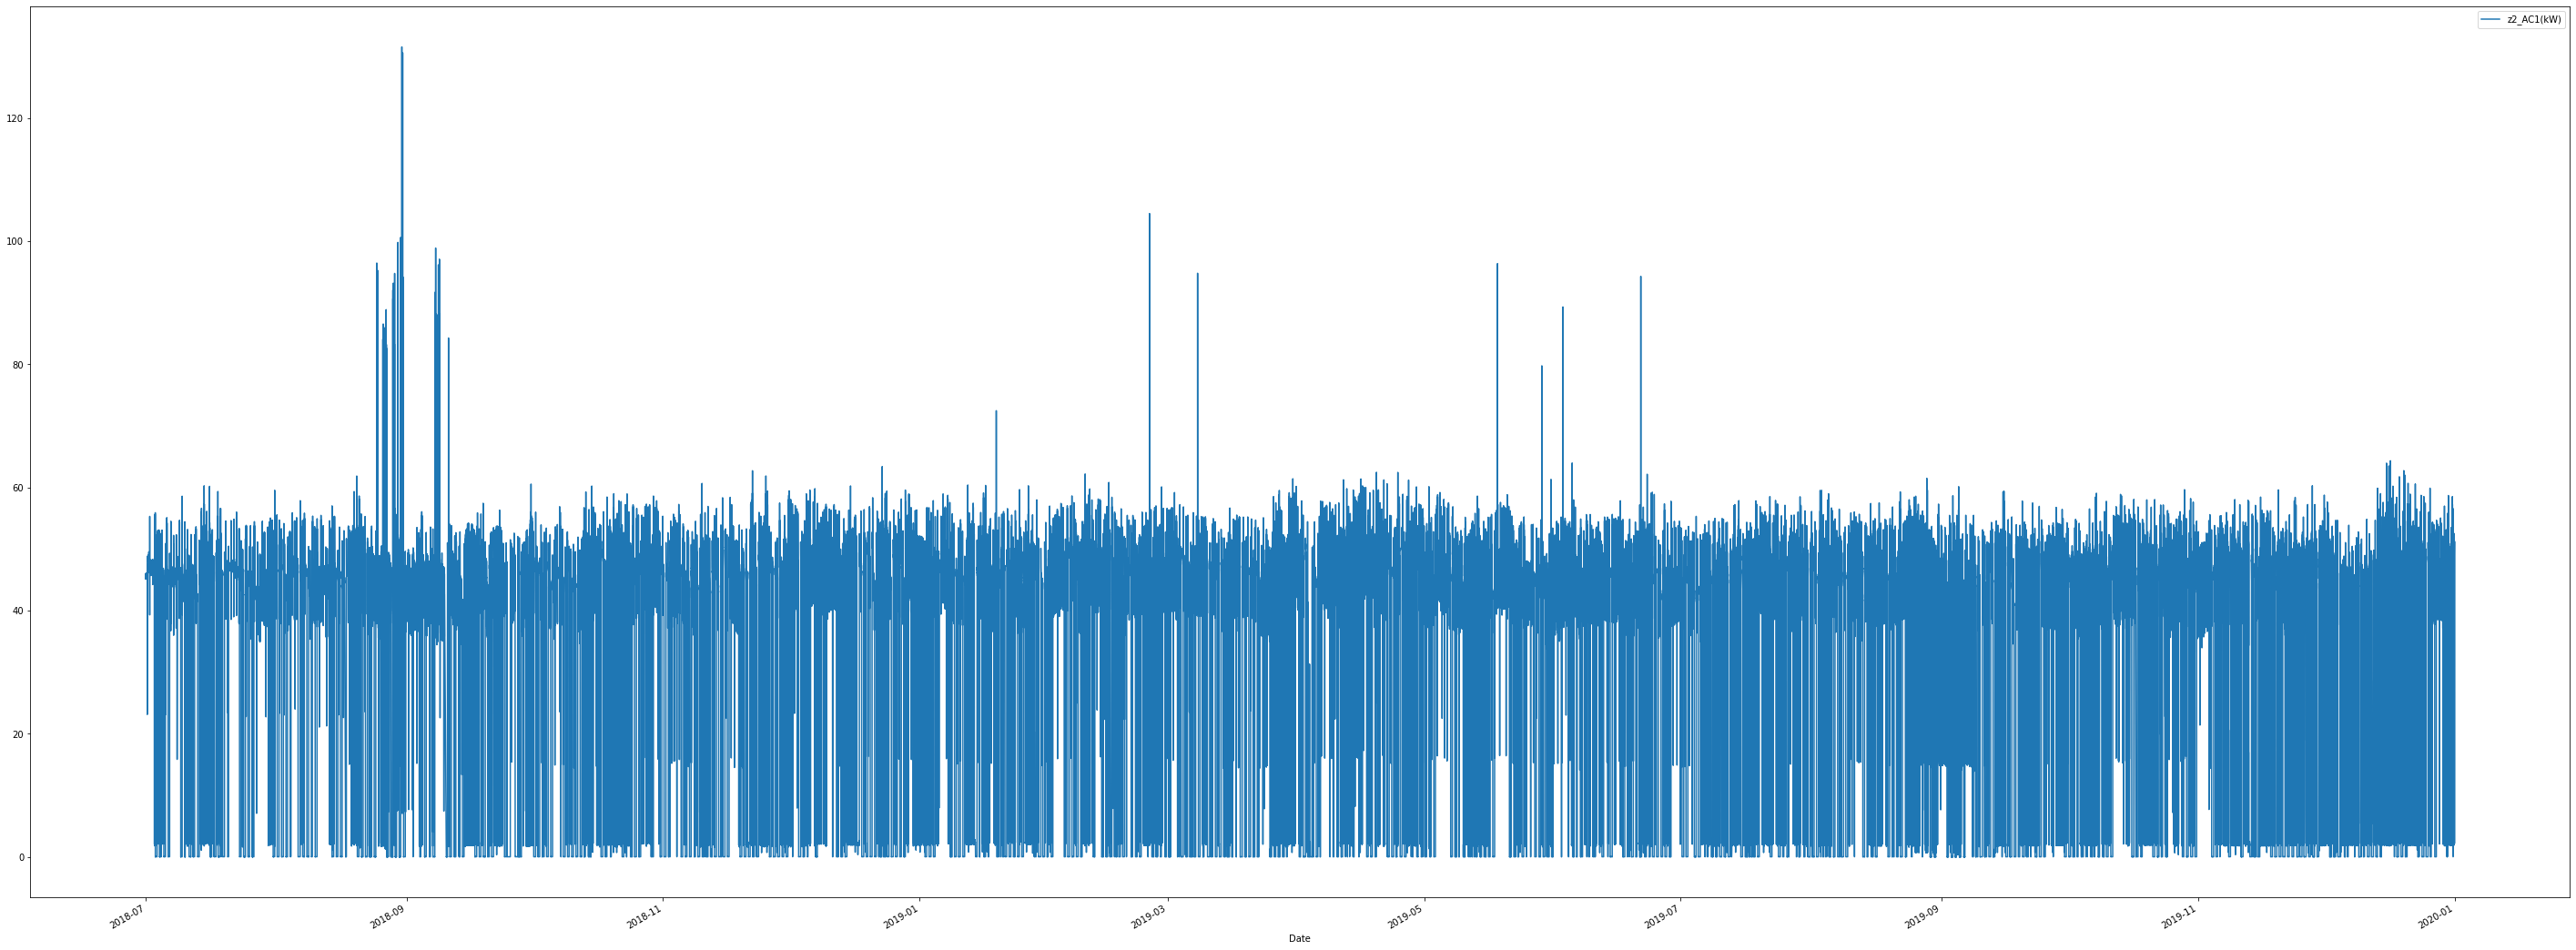

In [8]:
x.plot(figsize=(50,20))

In [9]:
y=x['2018-07-01':'2018-07-01']
y

,z2_AC1(kW)
Date,
2018-07-01 00:00:00,45.24
2018-07-01 00:01:00,45.28
2018-07-01 00:02:00,45.24
2018-07-01 00:03:00,45.26
2018-07-01 00:04:00,45.22
...,...
2018-07-01 23:55:00,46.58
2018-07-01 23:56:00,46.70
2018-07-01 23:57:00,46.72


<AxesSubplot:xlabel='Date'>

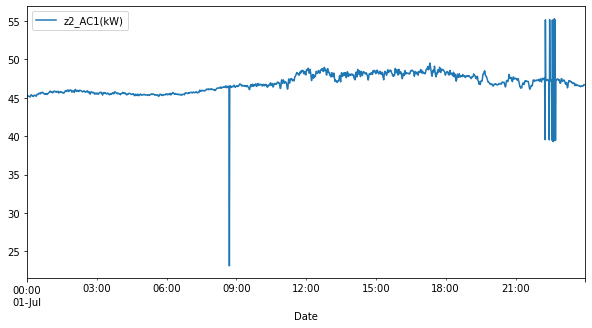

In [10]:
y.plot(figsize=(10,5))

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
res=adfuller(y['z2_AC1(kW)'])

In [13]:
def adfuller_test(p):
    result=adfuller(p)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [14]:
adfuller_test(y['z2_AC1(kW)'])

ADF Test Statistic : -1.755315687369489
p-value : 0.4028608236441414
#Lags Used : 24
Number of Observations Used : 1415
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [15]:
y['1st diff'] = y['z2_AC1(kW)'] - y['z2_AC1(kW)'].shift(1)

C:\Users\Sundar\AppData\Local\Temp\ipykernel_21424\118085859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['1st diff'] = y['z2_AC1(kW)'] - y['z2_AC1(kW)'].shift(1)


In [16]:
y.head()

,z2_AC1(kW),1st diff
Date,,
2018-07-01 00:00:00,45.24,NaN
2018-07-01 00:01:00,45.28,0.04
2018-07-01 00:02:00,45.24,-0.04
2018-07-01 00:03:00,45.26,0.02
2018-07-01 00:04:00,45.22,-0.04


In [17]:
adfuller_test(y['1st diff'].dropna())

ADF Test Statistic : -12.117805154018692
p-value : 1.8549577767074575e-22
#Lags Used : 23
Number of Observations Used : 1415
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

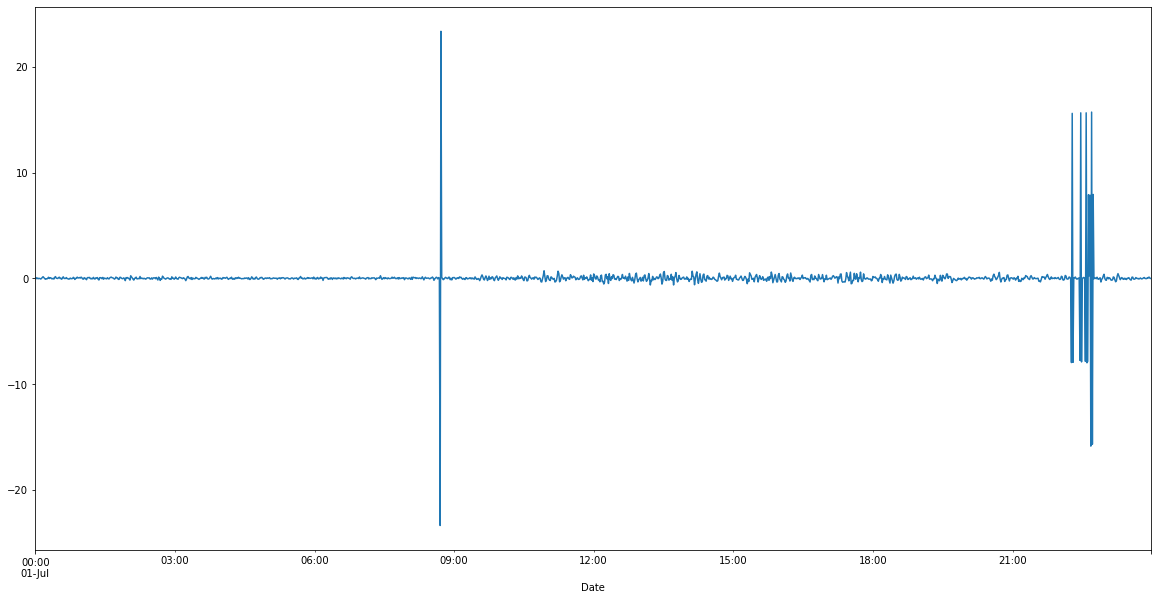

In [18]:
y['1st diff'].plot(figsize=(20,10))

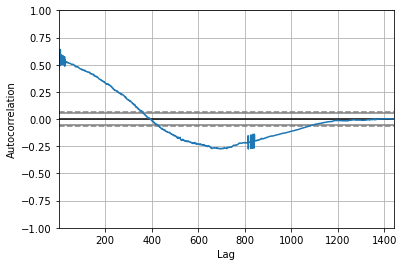

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y['z2_AC1(kW)'])
plt.show()

C:\Users\Sundar\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


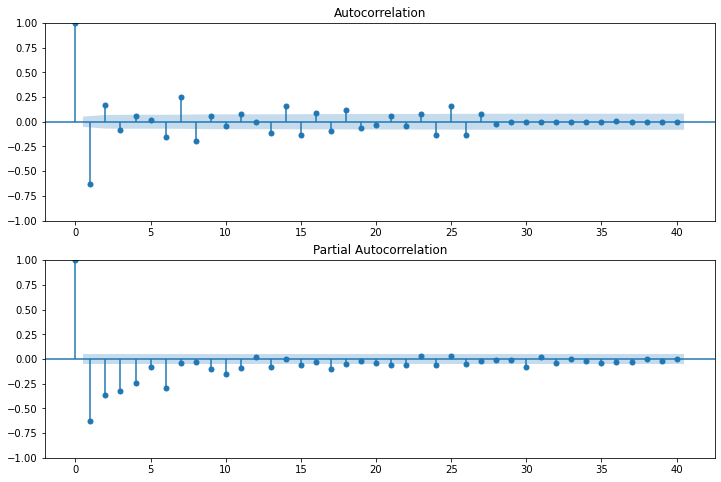

In [20]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y['1st diff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y['1st diff'].iloc[13:],lags=40,ax=ax2)


In [22]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [23]:
model=auto_arima(y['z2_AC1(kW)'],trace=True,suppress_warnings=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3958.643, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5251.503, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4540.900, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4037.506, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5249.504, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3956.729, Time=2.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3958.860, Time=2.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3954.735, Time=1.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3956.730, Time=1.67 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4333.969, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3953.087, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4036.046, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4538.903, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3955.080, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1973.543
Date:                Tue, 18 Apr 2023   AIC                           3953.087
Time:                        06:57:23   BIC                           3968.902
Sample:                    07-01-2018   HQIC                          3958.991
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2536      0.008    -33.569      0.000      -0.268      -0.239
ma.L1         -0.9195      0.008   -117.713      0.000      -0.935      -0.904
sigma2         0.9079      0.003    285.770      0.000       0.902       0.914
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           4381770.68
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              85.75   Skew:                           -10.68
Prob(H) (two-sided):                  0.00   Kurtosis:                       272.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.tsa.arima_model import ARIMA


In [26]:
print(y.shape)

(1440, 2)


In [27]:
train=y.iloc[:-30]
test=y.iloc[-30:]
print(train.shape,test.shape)

(1410, 2) (30, 2)


<AxesSubplot:xlabel='Date'>

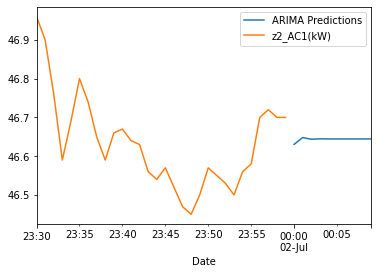

In [30]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['z2_AC1(kW)'].plot(legend=True)

In [35]:
test['z2_AC1(kW)'].mean()

46.63333333333333

In [ ]:
m1

In [121]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

#warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)

In [45]:
## Cleaning up the data
#df.columns=["Month","Sales"]
#df.isnull().sum()
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
## Drop last 2 rows
df.isnull().sum()

z1_Light(kW)    0
z1_Plug(kW)     0
z2_AC1(kW)      0
z2_AC2(kW)      0
z2_AC3(kW)      0
z2_AC4(kW)      0
z2_Light(kW)    0
z2_Plug(kW)     0
z3_Light(kW)    0
z3_Plug(kW)     0
z4_Light(kW)    0
dtype: int64

<Figure size 1440x360 with 0 Axes>

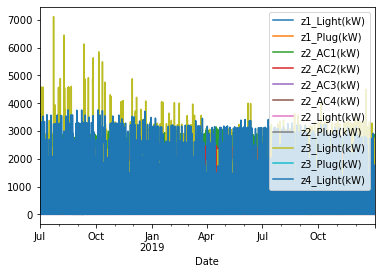

In [34]:
plt.figure(figsize=(20,5))
df.plot()
plt.show()

In [117]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])

In [118]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [119]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276248
p-value : 0.363915771660244
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [120]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)


In [121]:
df['Sales'].shift(1)

0         NaN
1      2815.0
2      2672.0
3      2755.0
4      2721.0
        ...  
100    4788.0
101    4618.0
102    5312.0
103    4298.0
104    1413.0
Name: Sales, Length: 105, dtype: float64

In [122]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [123]:
df.head(14)

,Month,Sales,Sales First Difference,Seasonal First Difference
0,1964-01,2815.0,NaN,NaN
1,1964-02,2672.0,-143.0,NaN
2,1964-03,2755.0,83.0,NaN
3,1964-04,2721.0,-34.0,NaN
4,1964-05,2946.0,225.0,NaN
5,1964-06,3036.0,90.0,NaN
6,1964-07,2282.0,-754.0,NaN
7,1964-08,2212.0,-70.0,NaN
8,1964-09,2922.0,710.0,NaN
9,1964-10,4301.0,1379.0,NaN


In [124]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

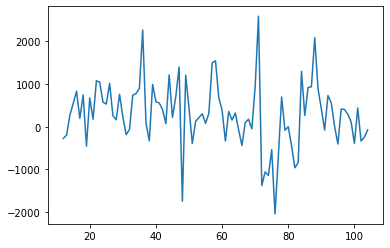

In [125]:
df['Seasonal First Difference'].plot()

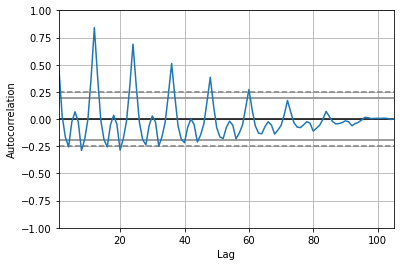

In [133]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()